In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import math
import scipy

# Birth rate data paths
path_15_19 = r'./Data/birth_rate/2020_est_salut_publica_tax_espec_fec_mares_15_19a.csv'
path_20_34 = r'./Data/birth_rate/2020_est_salut_publica_tax_espec_fec_mares_20_34a.csv'
path_35_49 = r'./Data/birth_rate/2020_est_salut_publica_tax_espec_fec_mares_35_49a.csv'

# Income data paths
income_2016_path = r'./Data/income/2016_renda_neta_mitjana_per_persona.csv'
income_2017_path = r'./Data/income/2017_renda_neta_mitjana_per_persona.csv'
income_2018_path = r'./Data/income/2018_renda_neta_mitjana_per_persona.csv'
income_2019_path = r'./Data/income/2019_renda_neta_mitjana_per_persona.csv'
income_2020_path = r'./Data/income/2020_renda_neta_mitjana_per_persona.csv'

# Import of the files using pandas
# Import birth data
birth_15_19 = pd.read_csv(path_15_19)
birth_20_34 = pd.read_csv(path_20_34)
birth_35_49 = pd.read_csv(path_35_49)
# Import income data
income_2016 = pd.read_csv(income_2016_path)
income_2017 = pd.read_csv(income_2017_path)
income_2018 = pd.read_csv(income_2018_path)
income_2019 = pd.read_csv(income_2019_path)
income_2020 = pd.read_csv(income_2020_path)

In [13]:
# Filterign the birth rate data for 2016-2020
birth_15_19 = birth_15_19[birth_15_19['Anys_Periode'] == '2016-2020']
birth_20_34 = birth_20_34[birth_20_34['Anys_Periode'] == '2016-2020']
birth_35_49 = birth_35_49[birth_35_49['Anys_Periode'] == '2016-2020']

# Distinguish between ages
birth_15_19['Age'] = '15-19'
birth_20_34['Age'] = '20-34'
birth_35_49['Age'] = '35-49'

birth_array = [birth_15_19, birth_20_34, birth_35_49]

# Merge the birth rate datafrmes
birth_rate_df = pd.concat(birth_array)
birth_rate_df = birth_rate_df.drop(columns='Anys_Periode')

In [8]:
birth_rate_df[birth_rate_df['Age'] == '15-19'].sort_values(by=['Nombre'], ascending=False).head(15)

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Nombre,Age
960,3,Sants-Montjuïc,12,la Marina del Prat Vermell,36.0,15-19
998,8,Nou Barris,50,les Roquetes,22.8,15-19
995,8,Nou Barris,47,Can Peguera,21.2,15-19
1001,8,Nou Barris,53,la Trinitat Nova,16.4,15-19
994,8,Nou Barris,46,el Turó de la Peira,14.4,15-19
1002,8,Nou Barris,54,Torre Baró,14.0,15-19
1003,8,Nou Barris,55,Ciutat Meridiana,14.0,15-19
1005,9,Sant Andreu,57,la Trinitat Vella,13.8,15-19
1007,9,Sant Andreu,59,el Bon Pastor,12.5,15-19
951,1,Ciutat Vella,3,la Barceloneta,12.2,15-19


In [125]:
birth_rate_df[(birth_rate_df['Nom_Districte'] == 'Sants-Montjuïc') & (birth_rate_df['Age'] == '15-19')]
birth_rate_df.Nom_Districte

949     Ciutat Vella
950     Ciutat Vella
951     Ciutat Vella
952     Ciutat Vella
953         Eixample
            ...     
1017      Sant Martí
1018      Sant Martí
1019      Sant Martí
1020      Sant Martí
1021      Sant Martí
Name: Nom_Districte, Length: 219, dtype: object

In [124]:
barna_barri.DISTRIC

0             la Marina de Port
1         la Font de la Guatlla
2                      el Raval
3               el Barri GÃ²tic
4                la Barceloneta
                ...            
68               BarÃ³ de Viver
69                el Bon Pastor
70                  Sant Andreu
71                   la Sagrera
72    el CongrÃ©s i els Indians
Name: NOM, Length: 73, dtype: object

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID_V,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
15,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,0,SÃ²lid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((427826.987 4586145.355, 427836.537 4..."
16,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,0,SÃ²lid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((430509.494 4583699.892, 430398.817 4..."
31,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,0,SÃ²lid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((429123.228 4585397.080, 429126.515 4..."
32,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,0,SÃ²lid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((429390.326 4585165.865, 429400.077 4..."
33,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,LÃ­mit de barri,...,0,SÃ²lid,0,0,41,NULL,#E66900,NULL,#73A88F,"POLYGON ((429790.428 4584472.396, 429806.062 4..."


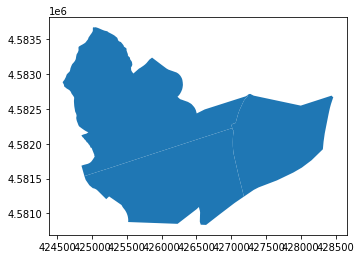

In [140]:
data_dir = '../'
barna_barri = gpd.read_file(data_dir + "0301040100_Barris_UNITATS_ADM.shp") 

Ciutat_Vella = barna_barri[barna_barri["DISTRICTE"].isin(['01'])]

Eixample = barna_barri[barna_barri["DISTRICTE"].isin(['02'])]

Sants_Montjuic = barna_barri[barna_barri["DISTRICTE"].isin(['03'])]

Les_Corts = barna_barri[barna_barri["DISTRICTE"].isin(['04'])]

Sarria_Saint_Gervasi = barna_barri[barna_barri["DISTRICTE"].isin(['05'])]

Gracia = barna_barri[barna_barri["DISTRICTE"].isin(['06'])]

Horta_Guirnardo = barna_barri[barna_barri["DISTRICTE"].isin(['07'])]

Nou_Barris = barna_barri[barna_barri["DISTRICTE"].isin(['08'])]

Saint_Andreu = barna_barri[barna_barri["DISTRICTE"].isin(['09'])]

Sant_Marti = barna_barri[barna_barri["DISTRICTE"].isin(['10'])]

Gracia.head()